# Observation Statistics

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import numpy as np
import wsdb

In [62]:
# grab observation details
sql = "select *, mjdtodecyear(mjdobs) as yobs from virac2_cat_index where reject=0"
data = wsdb.getsql(sql)

In [42]:
# some selections
# phot calib
pc = data["phot_calib"]==1
# gdr2 calib
gc = data["gdr2_calib"]==1
# combinations
pgc = np.logical_and(pc, gc)
pngc = np.logical_and(pc, ~gc)
gnpc = np.logical_and(gc, ~pc)

## Seeing/Airmass Distribution

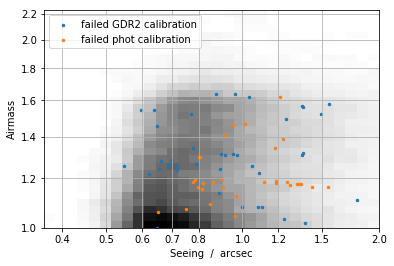

In [54]:
plt.hist2d(np.log10(data["seeing"][pgc]), np.log10(data["airmass"][pgc]), 
           bins=30, cmap='Greys', norm=PowerNorm(gamma=0.5))
xticks = [0.4,0.5,0.6,0.7,0.8,1.0,1.2,1.5,2.0]
plt.xticks(np.log10(xticks),["%.1f"%f for f in xticks])
yticks = [1.0,1.2,1.4,1.6,1.8,2.0,2.2]
plt.yticks(np.log10(yticks),["%.1f"%f for f in yticks])
plt.xlabel("Seeing  /  arcsec")
plt.ylabel("Airmass")
plt.grid()
plt.scatter(np.log10(data["seeing"][pngc]), np.log10(data["airmass"][pngc]), s=6, label="failed GDR2 calibration")
plt.scatter(np.log10(data["seeing"][gnpc]), np.log10(data["airmass"][gnpc]), s=6, label="failed phot calibration")
plt.legend(loc=("upper left"))

## Epoch Distribution

Text(0,0.5,u'Observations per week')

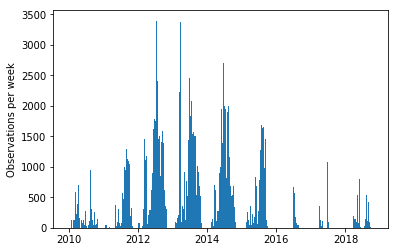

In [71]:
bins = np.arange(2010, 2018.8, 7./365.2422)
plt.hist(yobs[pgc], bins=bins)
plt.ylabel("Observations per week")

## Skynoise vs. Source Count

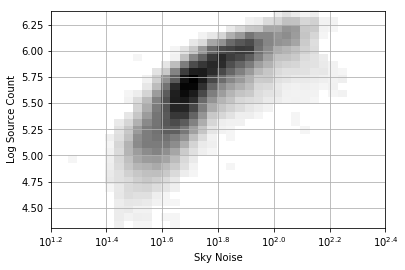

In [95]:
plt.hist2d(np.log10(data["skynoise"][pgc]), np.log10(data["source_count"][pgc]), 
           bins=30, cmap='Greys', norm=PowerNorm(gamma=0.3))
x_loc = plt.xticks()
plt.xticks(x_loc[0], [r"10$^{%.1f}$"%f for f in x_loc[0]])
plt.xlabel("Sky Noise")
plt.ylabel("Log Source Count")
plt.grid()